In [37]:
using CSV
using Dates
using DelimitedFiles 
using PyPlot
using DIVAnd
const plt=PyPlot

PyPlot

In [41]:
using PyCall
using PyPlot
colors = PyCall.pyimport("matplotlib.colors")
ccrs = PyCall.pyimport("cartopy.crs")
cfeature = PyCall.pyimport("cartopy.feature")
mticker = PyCall.pyimport("matplotlib.ticker")
coast = cfeature.GSHHSFeature(scale="full");
cartopyticker = PyCall.pyimport("cartopy.mpl.ticker")
lon_formatter = cartopyticker.LongitudeFormatter()
lat_formatter = cartopyticker.LatitudeFormatter()
# mainproj = ccrs.PlateCarree()
cmocean = PyCall.pyimport("cmocean")

dom = [-22.5, 12.5, 40, 68.]
dlon = 5.
dlat = 5.
mainproj = ccrs.Mercator(central_longitude=0.5*(dom[1] + dom[2]),
    min_latitude=dom[3], max_latitude=dom[4])
datacrs = ccrs.PlateCarree()

PyObject <cartopy.crs.PlateCarree object at 0x7f3ee1894180>

In [35]:
datadir = "./data/"
figdir = "../figures"
isdir(figdir) ? @debug("already there") : mkpath(figdir)
datafile = joinpath(datadir, "MBA_CPRdata_Emodnet_21Jan22.csv")
bathfile = joinpath(datadir, "gebco_30sec_16.nc")
isfile(datafile), isfile(bathfile)

(true, true)

## Grid configuration

In [53]:
Δlon = 0.25
Δlat = 0.2
longrid = dom[1]:Δlon:dom[2]
latgrid = dom[3]:Δlat:dom[4]

40.0:0.2:68.0

## Prepare mask

In [56]:
bx, by, b = DIVAnd.load_bath(bathfile, true, longrid, latgrid)
@show size(b)

fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection=mainproj)
pcm = ax.pcolormesh(bx, by, b', vmin=0., cmap=PyPlot.cm.gist_earth, transform=datacrs);
cb = plt.colorbar(pcm, orientation="vertical")
cb.set_label("Depth (m)", rotation=0, ha="left")
plt.savefig(joinpath(figdir, "benthos_bathy"), dpi=300, bbox_inches="tight")
plt.close()

size(b) = (141, 141)


## Data reading

In [57]:
data = readdlm(datafile, ',', skipstart=1);

In [5]:
lon = data[:,3]
lat = data[:,2]
year = data[:,4]
month = data[:,5]
thedates = Date.(year, month)
calanus_finmarchicus = data[:,6]
calanus_helgolandicus = data[:,7];

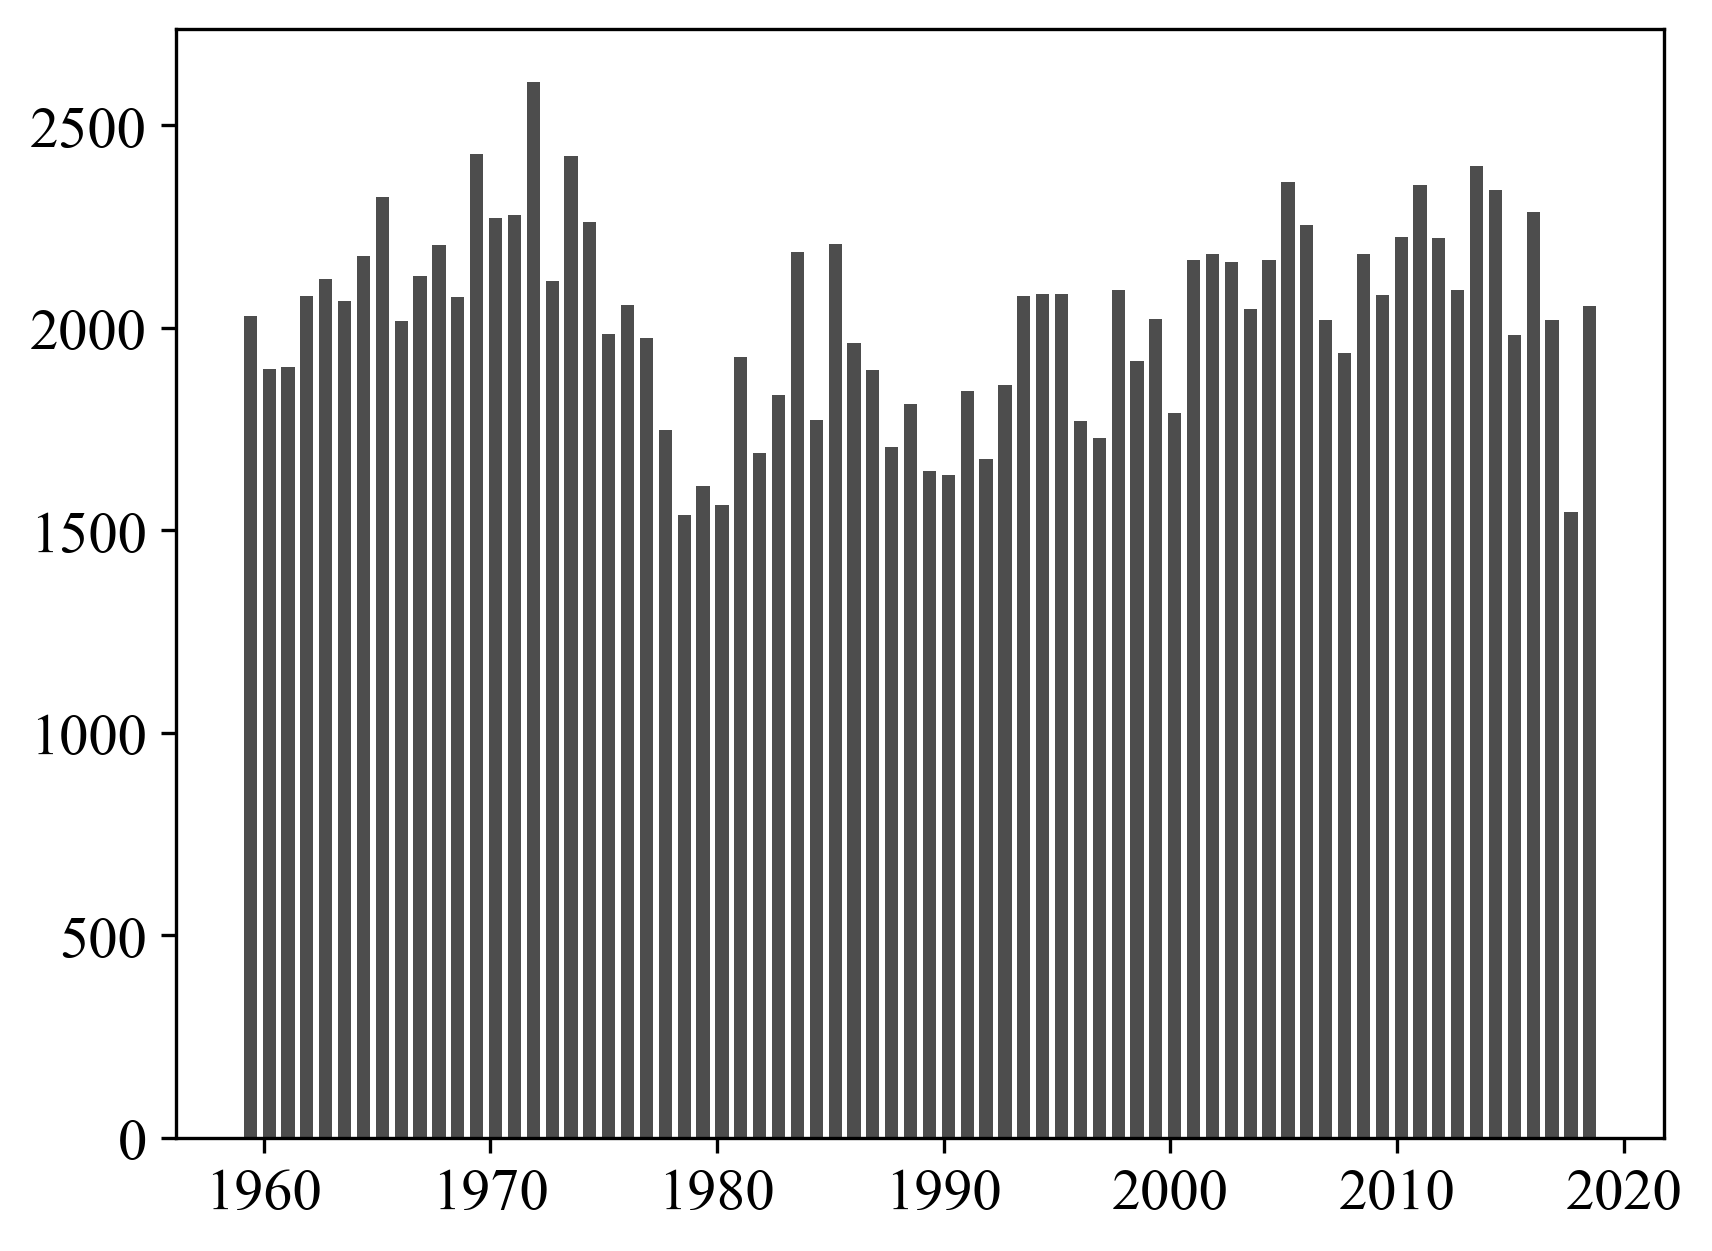

In [6]:
plt.hist(thedates, bins=12 * 6, rwidth=.7, color=".3")
plt.show()

In [34]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection=mainproj)
ax.plot(lon, lat, "ko", markersize=1, transform=datacrs)
ax.add_feature(coast, facecolor="#363636", edgecolor="k", zorder=5)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=true,
                      linewidth=.5, color="gray", alpha=1, linestyle="--")
gl.top_labels = false
gl.right_labels = false
gl.xformatter = lon_formatter
gl.yformatter = lat_formatter
gl.xlabel_style = Dict("size" => 10)
gl.ylabel_style = Dict("size" => 10)
ax.set_title("Locations of the observations")
plt.savefig(joinpath(figdir, "location_obs"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

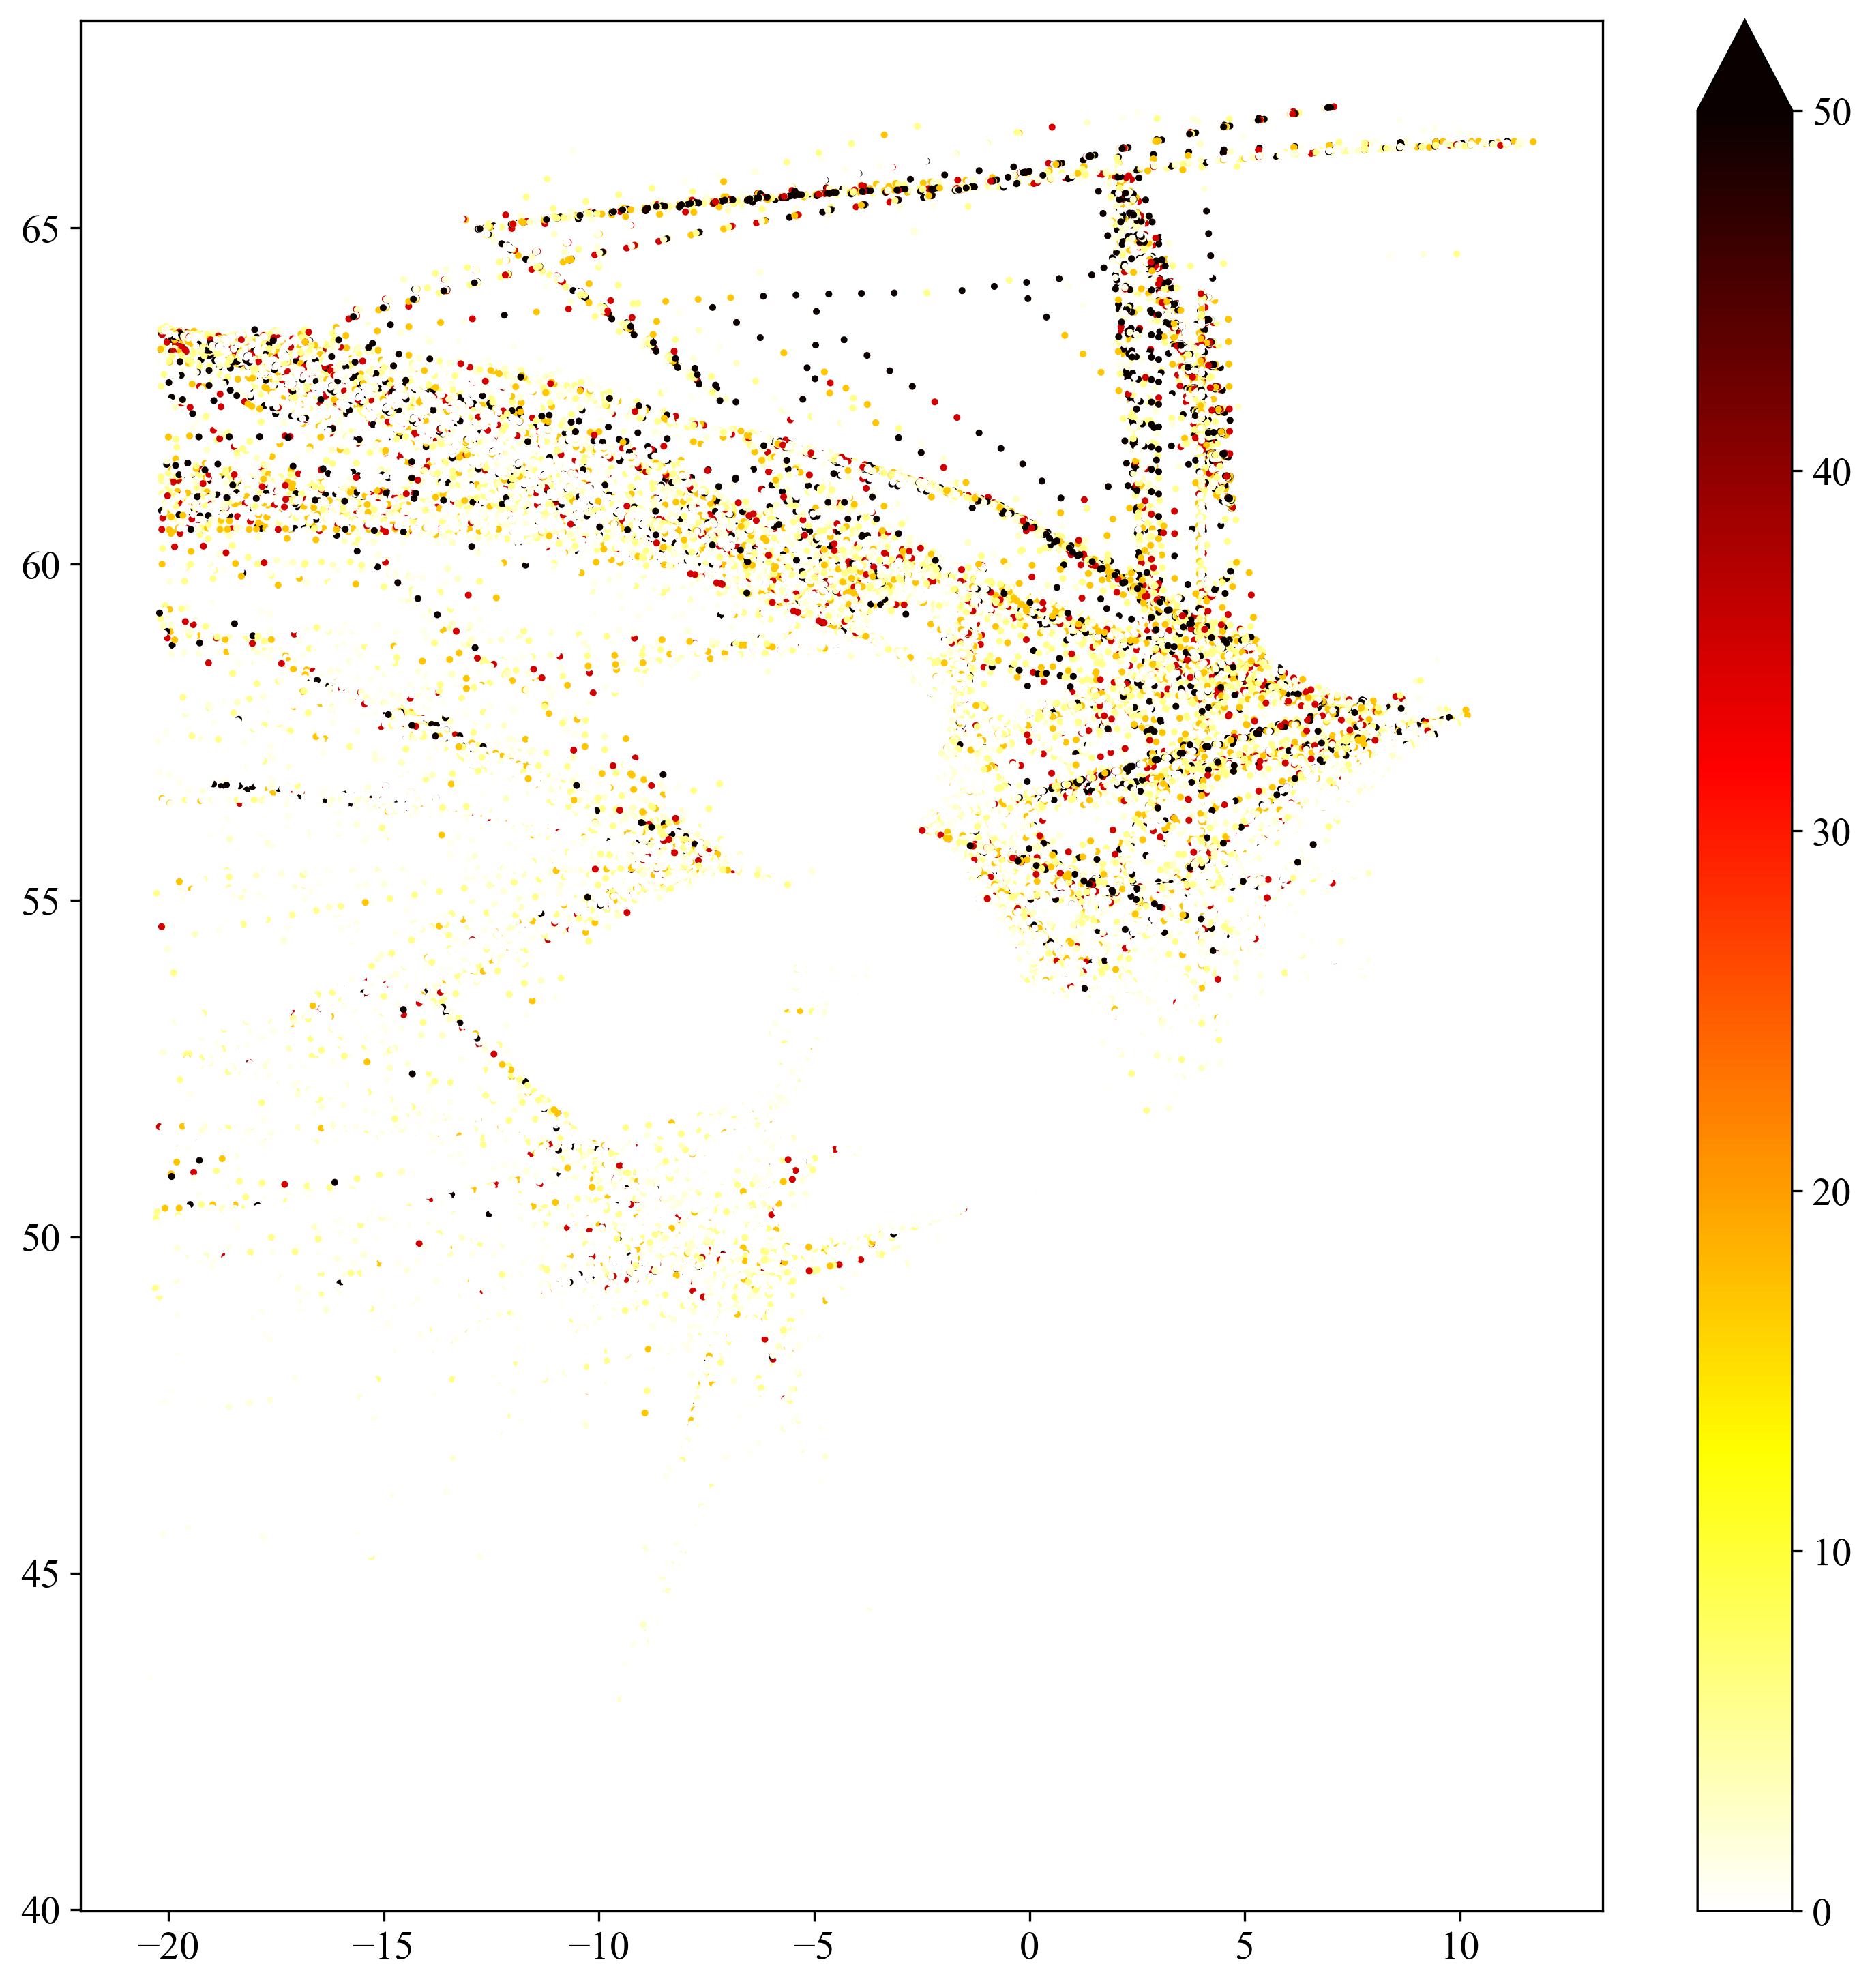

In [13]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111)
scat = ax.scatter(lon, lat, s=2, c=calanus_finmarchicus, cmap=plt.cm.hot_r, vmax=50.)
cb = plt.colorbar(scat, extend="max")
plt.show()

In [ ]:
## Prepare bathymetry